# Compiles all Sources of COP vs. Outdoor Temperature and Plots them

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
# File names of the pickled DataFrames containing the data
files = (
    #'temp_cop_manuf_max.pkl',
    'temp_cop_manuf_varying.pkl',
    #'../field_studies/kaluza/temp_cop_kaluza.pkl',
    '../field_studies/kaluza/temp_cop_kaluza_remote.pkl',
    '../field_studies/cchrc_2015/temp_cop_cchrc_dillingham.pkl',
    '../field_studies/cchrc_2015/temp_cop_cchrc_wrangell.pkl',
    '../field_studies/cadmus_vt/temp_cop_cadmus_vt.pkl',
    '../field_studies/harley/temp_cop_harley.pkl',
    '../field_studies/ba_2015/temp_cop_swinter.pkl',
)
df = None
for fn_pkl in files:
    if df is None:
        df = pd.read_pickle(fn_pkl)
    else:
        df = pd.concat([df, pd.read_pickle(fn_pkl)], sort=False)
df

,temperature,cop,source,field_study,hspf
0.0,5.000000,2.276667,"Manuf Spec, Varying Load",False,NaN
1.0,17.000000,2.609744,"Manuf Spec, Varying Load",False,NaN
2.0,47.000000,5.481243,"Manuf Spec, Varying Load",False,NaN
1.0,9.323181,2.203241,"Seward, Kaluza w/ Remote Therm",True,13.40
2.0,12.532493,2.210258,"Seward, Kaluza w/ Remote Therm",True,13.40
3.0,17.358148,2.345697,"Seward, Kaluza w/ Remote Therm",True,13.40
4.0,23.870238,2.617557,"Seward, Kaluza w/ Remote Therm",True,13.40
5.0,26.894927,2.749132,"Seward, Kaluza w/ Remote Therm",True,13.40
6.0,31.963712,2.814353,"Seward, Kaluza w/ Remote Therm",True,13.40
7.0,38.684881,2.842130,"Seward, Kaluza w/ Remote Therm",True,13.40


In [3]:
# define the theme by returning the dictionary of configurationsa
def larger():
    return {
        'config': {
            'view': {
                'height': 350,
                'width': 525,
            },
            'axis': {
                'labelFontSize': 14, 
                'titleFontSize': 16
            },
            'legend': {
                'labelFontSize': 12, 
                'titleFontSize': 14
            },
        }
    }

# register the custom theme under a chosen name
alt.themes.register('larger', larger)

# enable the newly registered theme
alt.themes.enable('larger')

ThemeRegistry.enable('larger')

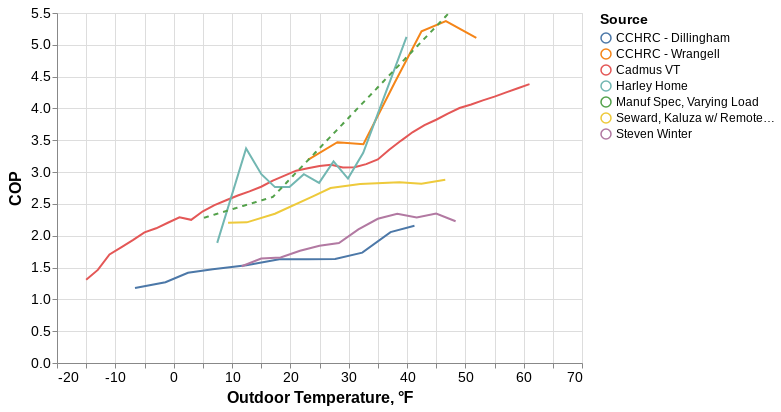

In [4]:
line1 = alt.Chart(df.query('field_study == True')).mark_line().encode(
    x = 'temperature',
    y = 'cop',
    color = 'source:N',
    #opacity = 'Selected:N',
)
line2 = alt.Chart(df.query('field_study == False')).mark_line(strokeDash=[5,5]).encode(
    x = alt.X('temperature', axis=alt.Axis(title='Outdoor Temperature, ℉')),
    y = alt.Y('cop', axis=alt.Axis(title='COP')),
    color = alt.Color('source:N', legend=alt.Legend(title="Source")),
    #opacity = 'Selected:N',
)
line1 + line2